In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [3]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [4]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
    # Gebruik merged_df zoals je wilt
    display(merged_df)
else:
    print("De data is nog niet geladen.")

,Datalogger port_x,"Dataloggertijd, in s_x",Cycle count,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Data in balancers [Case H2a solution -> (000000000000),...,CRC errors detected (0),Unknown packets (0),Number of times more or fewer fields than expected in a packet (0),gps long,gps lat,gps direction,gps speed,gps time,Datalogger port_y,Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:20,9.0,139.7875,32.061,41827.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,140.7872,33.061,41828.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,141.8034,34.077,41829.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,142.7867,35.060,41830.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:24,9.0,143.7927,36.067,41831.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 15:05:42,9.0,54342.0287,54242.418,192149.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:43,9.0,54343.0665,54243.461,192150.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:44,9.0,54344.0703,54244.461,192151.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#display all usful columns form filtered_df
data = merged_df[['Latitude', 
'Longitude', 
'Snelheid over de grond in km/h',
'VESC input current (A)',
                  "Snelheid tenopzichte van het water in Kilometers per uur",

'VESC input voltage (V)',]].copy()

data["VESC input vermogen (W)"] = data['VESC input current (A)']*data['VESC input voltage (V)']
data["Acceleratie boot tov grond"] = data["Snelheid over de grond in km/h"].diff()
data["Acceleratie boot tov water"] = data["Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [47]:
data

,Latitude,Longitude,Snelheid over de grond in km/h,VESC input current (A),Snelheid tenopzichte van het water in Kilometers per uur,VESC input voltage (V),VESC input vermogen (W),Acceleratie boot tov grond,Acceleratie boot tov water
Indextijd,,,,,,,,,
0 days 00:02:20,0.0000,0.000,0.0,NaN,0.0,NaN,NaN,NaN,NaN
0 days 00:02:21,0.0000,0.000,0.0,NaN,0.0,NaN,NaN,0.0,0.0
0 days 00:02:22,0.0000,0.000,0.0,NaN,0.0,NaN,NaN,0.0,0.0
0 days 00:02:23,0.0000,0.000,0.0,NaN,0.0,NaN,NaN,0.0,0.0
0 days 00:02:24,0.0000,0.000,0.0,NaN,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
0 days 15:05:42,5151.4518,552.208,0.0,NaN,0.0,NaN,NaN,0.0,0.0
0 days 15:05:43,5151.4518,552.208,0.0,NaN,0.0,NaN,NaN,0.0,0.0
0 days 15:05:44,5151.4518,552.208,0.0,NaN,0.0,NaN,NaN,0.0,0.0


In [57]:
#data = data[data["VESC input vermogen (W)"] > 0]
data = data[data["VESC input vermogen (W)"] < 4000]
data = data[data["Snelheid over de grond in km/h"] < 10000]
data = data.iloc[50:-1]

In [58]:
data

,Latitude,Longitude,Snelheid over de grond in km/h,VESC input current (A),Snelheid tenopzichte van het water in Kilometers per uur,VESC input voltage (V),VESC input vermogen (W),Acceleratie boot tov grond,Acceleratie boot tov water
Indextijd,,,,,,,,,
0 days 04:10:44,5110.6995,552.6903,3.7,2.594,4.65,30.42,78.90948,0.0,0.0
0 days 04:10:45,5110.6999,552.6910,3.7,2.577,4.65,30.42,78.39234,0.0,0.0
0 days 04:10:46,5110.7001,552.6917,3.7,2.585,4.65,30.41,78.60985,0.0,0.0
0 days 04:10:47,5110.7003,552.6927,3.7,2.622,4.65,30.43,79.78746,0.0,0.0
0 days 04:10:48,5110.7006,552.6932,3.7,2.605,4.65,30.45,79.32225,0.0,0.0
...,...,...,...,...,...,...,...,...,...
0 days 14:53:48,5151.4375,552.2449,1.9,0.000,8.89,29.48,0.00000,0.2,0.0
0 days 14:53:49,5151.4375,552.2449,1.9,0.000,8.89,29.48,0.00000,0.0,0.0
0 days 14:53:50,5151.4375,552.2449,0.0,0.000,8.89,29.49,0.00000,-1.9,0.0


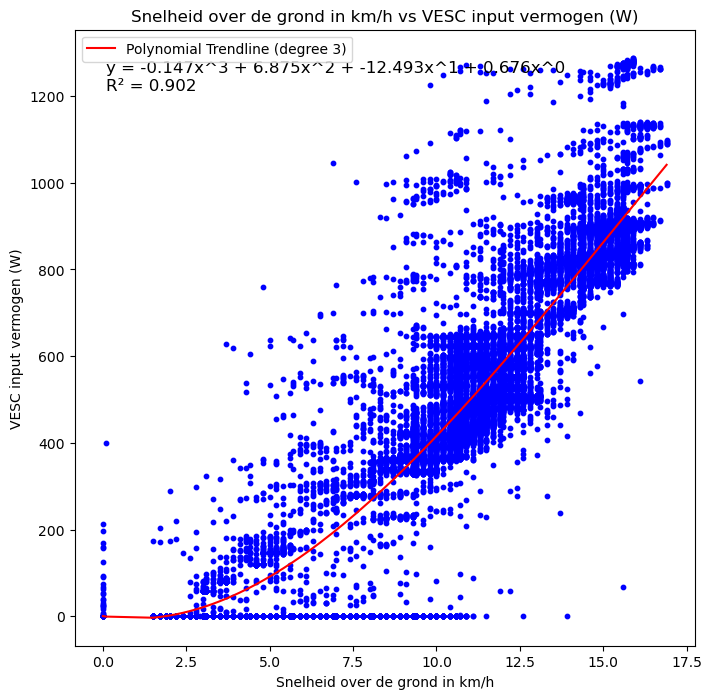

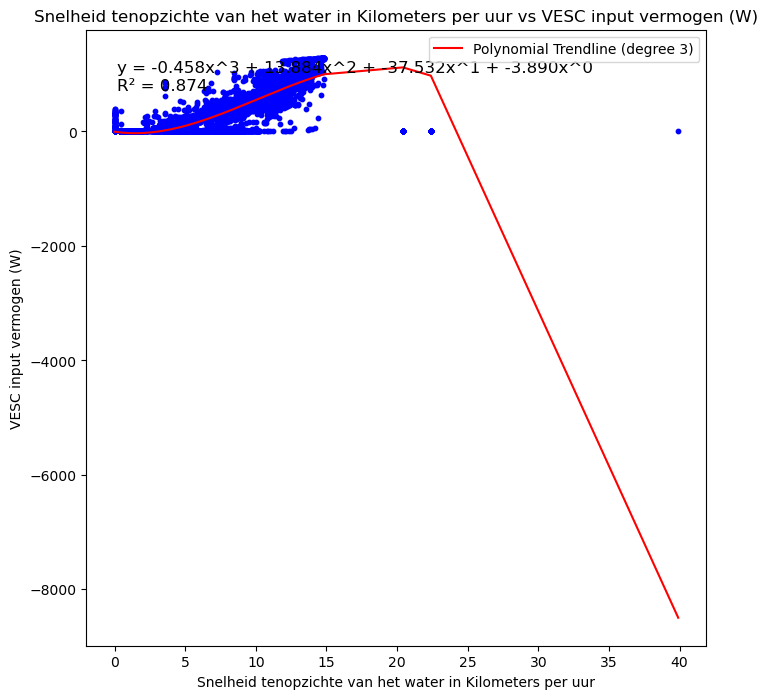

KeyError: 'tijd'

In [59]:
lib.plot_data(data,'Snelheid over de grond in km/h',"VESC input vermogen (W)", trendline="polynomial",degree=3)
lib.plot_data(data, 'Snelheid tenopzichte van het water in Kilometers per uur', "VESC input vermogen (W)", trendline="polynomial",degree=3)
lib.plot_data(data,'Snelheid over de grond in km/h',"tijd",trendline="polynomial",degree=2)

In [43]:
# Example usage with the new dataset
data_new = data.copy()

data_new = lib.calculate_distance_from_speed(data_new)
data_new = lib.calculate_distance_from_gps(data_new)
#data_new = lib.calculate_total_energy_MPPTS(data_new)

In [44]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [45]:
def bereken_snelheden(df, kolom_wattage,begin_snelheid = 0.01, massa=500, eta=0.7, rho_water=1000, Cd_water=0.3, A_water=0.6, rho_lucht=1.225, Cd_lucht=0.1, A_lucht=0.8, dt=1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'theoretische snelheid met weerstand' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = begin_snelheid  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.iloc[i][kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['theoretische snelheid met weerstand'] = snelheden
    return df

In [46]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')
data_new["Verschil snelheid grond en theoretisch"]= data_new["Snelheid over de grond in km/h"]-data_new['theoretische snelheid met weerstand']*3.6
data_new["Verschil snelheid water en theoretisch"]= data_new["Snelheid tenopzichte van het water in Kilometers per uur"]-data_new['theoretische snelheid met weerstand']*3.6

In [47]:
data_new

,Latitude,Longitude,Snelheid over de grond in km/h,VESC input current (A),Snelheid tenopzichte van het water in Kilometers per uur,VESC input voltage (V),VESC input vermogen (W),Acceleratie boot tov grond,Acceleratie boot tov water,Cumulative Distance from Speed (m),Cumulative Distance from GPS (m),Theoretical Speed (m/s),Theoretical Distance (m),theoretische snelheid met weerstand,Verschil snelheid grond en theoretisch,Verschil snelheid water en theoretisch
Indextijd,,,,,,,,,,,,,,,,
0 days 04:10:09,5110.6920,552.6617,4.6,2.886000,4.65,30.390000,87.705540,0.0,0.00,1.277778,0.000000,0.418821,4.188211e-01,0.010000,4.564000,4.614000
0 days 04:10:10,5110.6922,552.6626,4.4,2.660000,4.65,30.400000,80.864000,-0.2,0.00,2.500000,1.112550,0.580637,9.994578e-01,11.330942,-36.391391,-36.141391
0 days 04:10:11,5110.6924,552.6632,4.3,2.584000,4.65,30.380000,78.501920,-0.1,0.00,3.694444,1.904081,0.702953,1.702411e+00,0.000000,4.300000,4.650000
0 days 04:10:12,5110.6924,552.6646,4.3,2.579000,4.65,30.380000,78.350020,0.0,0.00,4.888889,3.535744,0.806748,2.509159e+00,0.000000,4.300000,4.650000
0 days 04:10:13,5110.6927,552.6652,4.1,2.596667,4.65,30.366667,78.852111,-0.2,0.00,6.027778,4.429289,0.899193,3.408352e+00,0.000000,4.100000,4.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:53:25,5151.4300,552.2400,8.9,4.612000,11.74,29.540000,136.238480,-0.9,-0.69,103618.361111,107340.504948,195.266173,4.039791e+06,0.000000,8.900000,11.740000
0 days 14:53:26,5151.4312,552.2407,8.1,1.632000,9.76,29.550000,48.225600,-0.8,-1.98,103620.611111,107342.870959,195.266420,4.039986e+06,0.000000,8.100000,9.760000
0 days 14:53:27,5151.4324,552.2412,7.4,13.725000,9.20,29.300000,402.142500,-0.7,-0.56,103622.666667,107345.169124,195.268480,4.040181e+06,0.000000,7.400000,9.200000


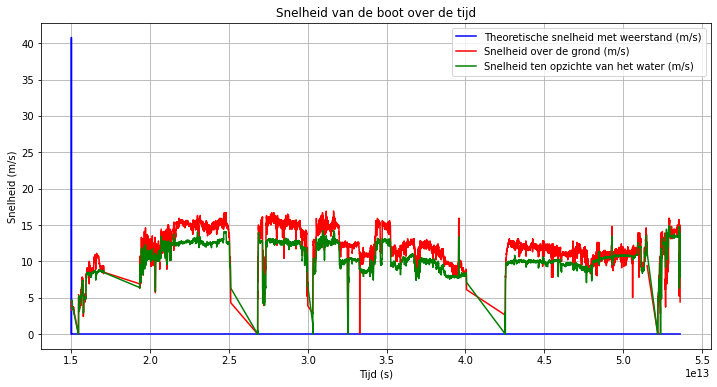

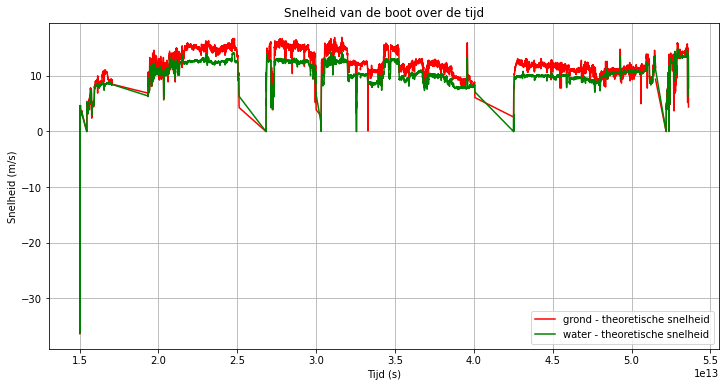

In [48]:
plt.figure(figsize=(12, 6))

# Plot de theoretische snelheid met weerstand
plt.plot(data_new.index, data_new['theoretische snelheid met weerstand']*3.6, label='Theoretische snelheid met weerstand (m/s)', color='b')

# Plot de snelheid over de grond
plt.plot(data_new.index, data_new['Snelheid over de grond in km/h'], label='Snelheid over de grond (m/s)', color='r')

# Plot de snelheid ten opzichte van het water
plt.plot(data_new.index, data_new['Snelheid tenopzichte van het water in Kilometers per uur'], label='Snelheid ten opzichte van het water (m/s)', color='g')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data_new.index, data_new["Verschil snelheid grond en theoretisch"], label='grond - theoretische snelheid', color='r')
plt.plot(data_new.index,data_new['Verschil snelheid water en theoretisch'] , label='water - theoretische snelheid', color='g')
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()

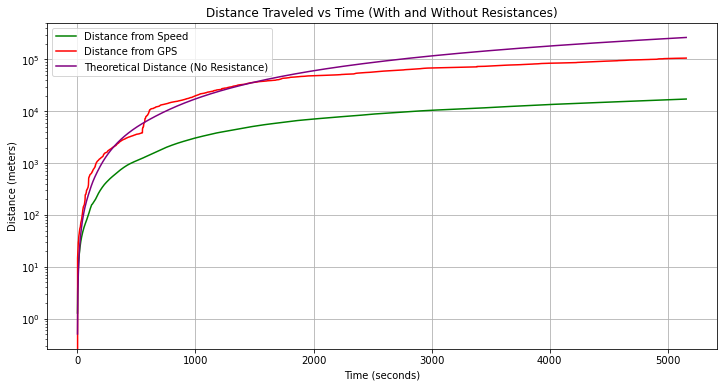

In [114]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Only take the values that are not 0
latitude = merged_df['Latitude']
latitude = latitude[latitude != 0]
longitude = merged_df['Longitude']
longitude = longitude[longitude != 0]
#remove nan values from latitude and longitude
latitude = latitude.dropna()
longitude = longitude.dropna()


In [79]:
valid_data

Indextijd
0 days 00:02:20    False
0 days 00:02:21    False
0 days 00:02:22    False
0 days 00:02:23    False
0 days 00:02:24    False
                   ...  
0 days 15:05:42     True
0 days 15:05:43     True
0 days 15:05:44     True
0 days 15:05:45     True
0 days 15:05:46     True
Freq: S, Length: 54207, dtype: bool

In [5]:
# Clean up the data: Remove zero and NaN values from latitude, longitude, and speed
latitude = merged_df['Latitude']
longitude = merged_df['Longitude']
speed = merged_df['Snelheid over de grond in km/h']

# Filter out invalid values (0s, NaNs, and speed less than 100 km/h)
valid_data = (latitude != 0) & (longitude != 0) & latitude.notna() & longitude.notna() & speed.notna() & (speed < 100)


latitude = latitude[valid_data]
longitude = longitude[valid_data]
speed = speed[valid_data]

# Only take the data from the 15000th row
latitude = latitude[15000:]
longitude = longitude[15000:]
speed = speed[15000:]

# Downsample the data to improve performance (take every 10th point)
latitude = latitude[::10]
longitude = longitude[::10]
speed = speed[::10]

In [6]:
lib.plot_trajectory_map(latitude, longitude, speed)